<a href="https://colab.research.google.com/github/amalsalilan/Extract-point-of-interests-from-image/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import numpy
print("shape of x_train ",x_train.shape)
num_labels=len(np.unique(y_train))
print("the labels ",num_labels)

shape of x_train  (60000, 28, 28)
the labels  10


In [ ]:
from tensorflow.keras.utils import to_categorical
print(y_train[0])
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
image_size=x_train.shape[1]
print(image_size)

28


In [ ]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
# for reshaping
x_train=np.reshape(x_train,[-1,image_size,image_size,1])
x_test=np.reshape(x_test,[-1,image_size,image_size,1])
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# Normalising
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
# taking the input size into a variable
input_shape=(image_size,image_size,1)

:we are creating just variables to mention in our layer

In [ ]:
batch_size=128
kernal_size=3
pool_size=2
fillters=64
dropout=0.2

the parameters are now done
now we need to create a sequentional model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

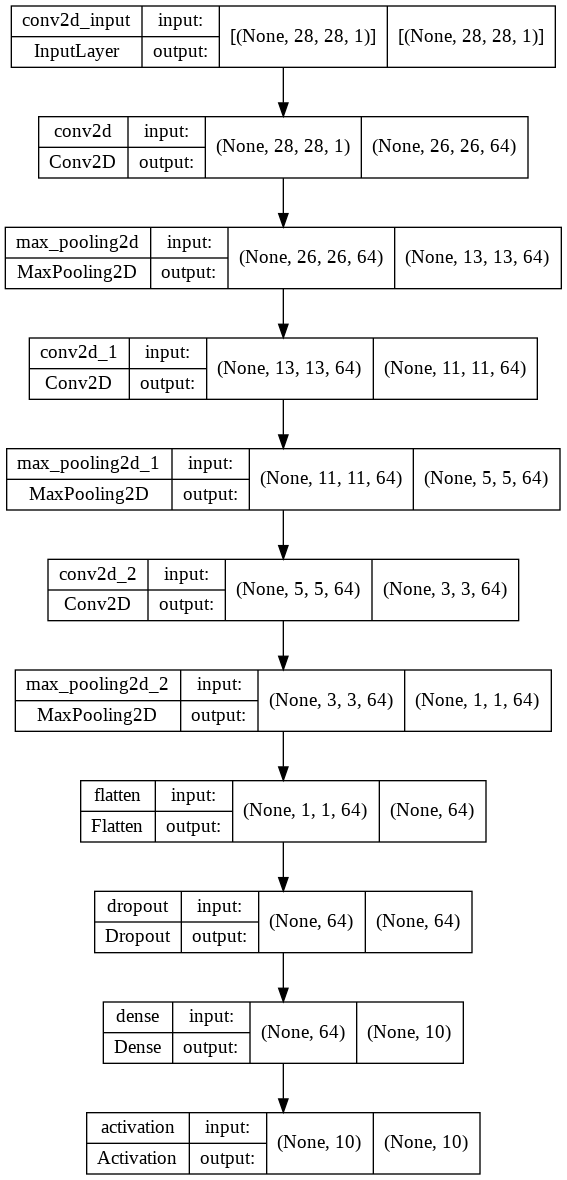

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.layers import Activation,Dense,Dropout
from tensorflow.keras.utils import plot_model
model=Sequential()
model.add(Conv2D(filters=fillters,kernel_size=kernal_size,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=fillters,kernel_size=kernal_size,activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=fillters,kernel_size=kernal_size,activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model,to_file='cnn_mnist.png',show_shapes=True)


next step is to combile the model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

next is to train the model

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 77s 164ms/step - loss: 0.3878 - accuracy: 0.8811
Epoch 2/10
469/469 [==============================] - 77s 163ms/step - loss: 0.1365 - accuracy: 0.9587
Epoch 3/10
469/469 [==============================] - 75s 160ms/step - loss: 0.1014 - accuracy: 0.9688
Epoch 4/10
469/469 [==============================] - 76s 162ms/step - loss: 0.0800 - accuracy: 0.9754
Epoch 5/10
469/469 [==============================] - 76s 163ms/step - loss: 0.0697 - accuracy: 0.9782
Epoch 6/10
469/469 [==============================] - 76s 163ms/step - loss: 0.0604 - accuracy: 0.9820
Epoch 7/10
469/469 [==============================] - 76s 162ms/step - loss: 0.0534 - accuracy: 0.9839
Epoch 8/10
469/469 [==============================] - 77s 164ms/step - loss: 0.0476 - accuracy: 0.9849
Epoch 9/10
469/469 [==============================] - 76s 161ms/step - loss: 0.0429 - accuracy: 0.9869
Epoch 10/10
469/469 [==============================] - 76s 162ms/step - l

now we are evaluating the model using testing data

In [ ]:
loss,acc=model.evaluate(x_test,y_test,batch_size=batch_size)
print("\nTest accuracy : %.1f%%" %(100.0*acc))

79/79 [==============================] - 1s 5ms/step - loss: 0.0412 - accuracy: 0.9897

Test accuracy : 99.0%


using CNN we are able to acrchive best score
we can get pretrained models like:VGGNet_CNN 
 the acrhiteture of vggnet : https://www.researchgate.net/figure/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only_fig3_322512435